<a href="https://colab.research.google.com/github/kalyankargouri/ANN/blob/main/experiment3.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best-fit line using sigmoid: y = 6.59149x + -3.69806


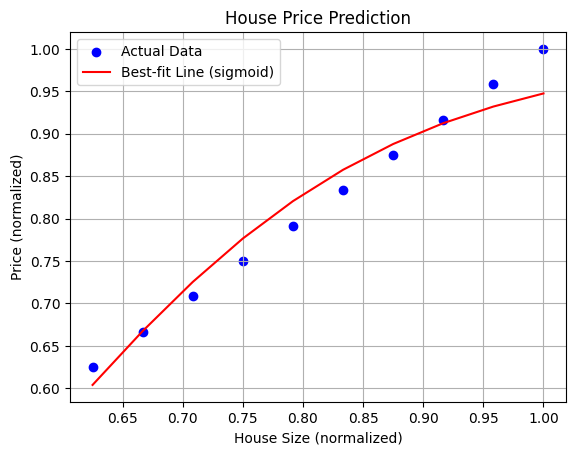

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

def compute_cost(y, y_pred):
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient_descent(x, y, m, b, learning_rate, iterations, activation):
    n = len(y)
    for _ in range(iterations):
        linear_output = m * x + b
        if activation == 'sigmoid':
            predictions = sigmoid(linear_output)
        elif activation == 'relu':
            predictions = relu(linear_output)
        elif activation == 'tanh':
            predictions = tanh(linear_output)
        else:
            predictions = linear_output

        dm = (-2 / n) * np.sum(x * (y - predictions))
        db = (-2 / n) * np.sum(y - predictions)
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

# Sample dataset: House Size vs Price
x = np.array([750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200])  # House size (sq ft)
y = np.array([150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000])  # Price ($)

# Normalize data
x = x / np.max(x)
y = y / np.max(y)

# Initial values
m = 0
b = 0
learning_rate = 0.1
iterations = 10000
activation_function = 'sigmoid'  # Change to 'relu' or 'tanh' for different activation functions

# Train model using Gradient Descent
m, b = gradient_descent(x, y, m, b, learning_rate, iterations, activation_function)

# Predictions
y_pred = m * x + b
if activation_function == 'sigmoid':
    y_pred = sigmoid(y_pred)
elif activation_function == 'relu':
    y_pred = relu(y_pred)
elif activation_function == 'tanh':
    y_pred = tanh(y_pred)

# Display results
print(f"Best-fit line using {activation_function}: y = {m:.5f}x + {b:.5f}")

# Plot data and regression line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label=f'Best-fit Line ({activation_function})')
plt.xlabel("House Size (normalized)")
plt.ylabel("Price (normalized)")
plt.title("House Price Prediction")
plt.legend()
plt.grid()
plt.show()